In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research Question 1
### What is the number and proportion of GitHub repositories that are using GitHub Actions workflows, categorized by their main programming language?

In [153]:
## The first dataset we will use contains information about GitHub repositories that make use of GitHub Actions workflows.

df_repositories = pd.read_csv('../datasets/repositories.csv')
df_repositories

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


### Requirements : 
#### 1-First, preprocess the dataset by filtering on repositories with at least 100 stars AND more than 1 contributors
#### 2-Quantify the number of repositories, grouped by language
    Hint: Use the groupby operation from pandas. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#### 3-Quantify the proportion of repositories per language
    Hint: proportion per langage = number of repositories per language / total number of repositories

In [154]:
df_stars = df_repositories[(df_repositories['stars']) > 100 & (df_repositories['contributors'] > 1.0)]

In [155]:
df_results = pd.DataFrame()
df_results["Count"] = df_stars.groupby('language').size()
df_results

,Count
language,
C,4314
C#,3630
C++,5701
Go,4988
Java,6105
JavaScript,13542
Kotlin,1150
Objective-C,684
PHP,4005


In [156]:
df_results["percentage"] = df_stars.groupby('language').size().div(len(df_stars))*100

df_results

,Count,percentage
language,,
C,4314,6.238882
C#,3630,5.249685
C++,5701,8.244754
Go,4988,7.213617
Java,6105,8.829016
JavaScript,13542,19.584364
Kotlin,1150,1.663123
Objective-C,684,0.989197
PHP,4005,5.792008


## Research Question 2
### What are the top 10 most frequent events that trigger workflows, and what is the proportion of workflows using them?

In [157]:
## The second dataset we will use contains information about GitHub workflows, each reposity may define one or more workflows.

df_workflows = pd.read_csv('../datasets/workflows.csv')
df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"push, pull_request",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"pull_request, push",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,pull_request,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3


### Requirements : 
#### 1-Split the events column (containig the triggers) and explode it 
    Hint: For the split function, see https://www.geeksforgeeks.org/python-string-split/
    For the explode function, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
#### 2-Quantify the number of workflows grouped by event
#### 3-Quantify the proportion of workflows grouped by event
    Hint: proportion per event = number of workflows per event / total number of workflows
#### 4-Sort all events in decreasing order of proportion
#### 5-Using the order of step 4, quantify the cumulative proportion of workflows
    Hint: The cumulative proportion is calculated by dividing the cumulative frequency by the total frequency.
    See, for example, https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

In [158]:
df_workflows['events'] = df_workflows['events'].str.split(',')
df_workflows['events'] = df_workflows['events'].explode('events')
df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,push,2
1,0101/pipetools,publish_docs.yml,Publish docs,pull_request,1
2,05bit/peewee-async,ci.yml,CI,push,1
3,07akioni/css-render,nodejs.yml,Node.js CI,push,1
4,0b01001001/spectree,pythonpackage.yml,Python package,pull_request,2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,push,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,pull_request,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,push,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,pull_request,3


In [159]:
df_results = pd.DataFrame()
df_results["count"] = df_workflows.groupby('events').size()

In [160]:
df_results["percentage"] = df_workflows.groupby('events').size().div(sum(df_results['count']))

In [161]:
df_results.sort_values(by=['percentage'], ascending=False, inplace=True)

In [162]:
df_results['cumulative_percentage'] = df_results['percentage'].cumsum()
df_results  

,count,percentage,cumulative_percentage
events,,,
push,26278,0.373990,0.373990
pull_request,18295,0.260375,0.634365
pull_request,5631,0.080141,0.714505
schedule,3667,0.052189,0.766694
workflow_dispatch,3122,0.044432,0.811127
...,...,...,...
types,1,0.000014,0.999943
paths,1,0.000014,0.999957
gollum,1,0.000014,0.999972


## Research Question 3

The GitHub Actions marketplace classifies all published actions in a predefined set of categories (e.g., api-management, continuous-integration, publishing, utilities)
Each action has a required primary category and an optional secondary category.

### What is the number and proportion of GitHub Actions that can be found in each category?

In [163]:
## The third dataset we will use contains information about GitHub Actions that are published in GitHub marketplace.

df_actions = (
    pd.read_csv('../datasets/actions.csv')
    .assign(category=lambda d:d.apply(lambda s: eval(s.categories), axis=1))
    [['actions','category','stars','open_issues','pull_requests']]
)
df_actions

,actions,category,stars,open_issues,pull_requests
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0
...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0


### Requirements : 
#### 1-Create a new column that contains the primary category of the action
#### 2-Quantify the number of actions grouped by primary category
#### 3-Quantify the proportion of action grouped by primary category
#### 4-Visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others".
    Hint: For information about pie charts, see https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html and https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories

In [164]:
#Create a new column that contain the primary category of the action
df_actions['primary_category'] = df_actions['category'].apply(lambda x: x[0])
df_actions

,actions,category,stars,open_issues,pull_requests,primary_category
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0,api-management
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0,dependency-management
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0,monitoring
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0,api-management
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0,api-management
...,...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0,utilities
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0,publishing


In [165]:
df_results = pd.DataFrame()
df_results["count"] = df_actions.groupby('primary_category').size()

In [166]:
df_results["percentage"] = df_actions.groupby('primary_category').size().div(len(df_actions))
df_results

,count,percentage
primary_category,,
ai-assisted,3,0.000329
api-management,161,0.017632
backup-utilities,21,0.002300
chat,256,0.028036
code-quality,451,0.049392
code-review,765,0.083781
code-scanning-ready,5,0.000548
code-search,10,0.001095
community,1,0.000110


([<matplotlib.patches.Wedge at 0x7f264eb2aa40>,
 [Text(1.062117383915947, 0.2861934010132744, 'code-review'),
  Text(0.24782921490975737, 1.071718563913686, 'continuous-integration'),
  Text(-0.9144194390443904, 0.6114221859711525, 'deployment'),
  Text(-0.596397041824547, -0.9242892234051686, 'other'),
  Text(0.8561413533389894, -0.6906677805594262, 'project-management'),
  Text(1.0770310097810694, -0.22361619791502185, 'security')],
 [Text(0.5793367548632438, 0.156105491461786, '8.4%'),
  Text(0.13517957176895856, 0.5845737621347378, '26.0%'),
  Text(-0.4987742394787583, 0.3335030105297195, '12.5%'),
  Text(-0.32530747735884374, -0.504157758221001, '38.1%'),
  Text(0.4669861927303578, -0.37672788030514154, '8.6%'),
  Text(0.5874714598805832, -0.1219724715900119, '6.5%')])

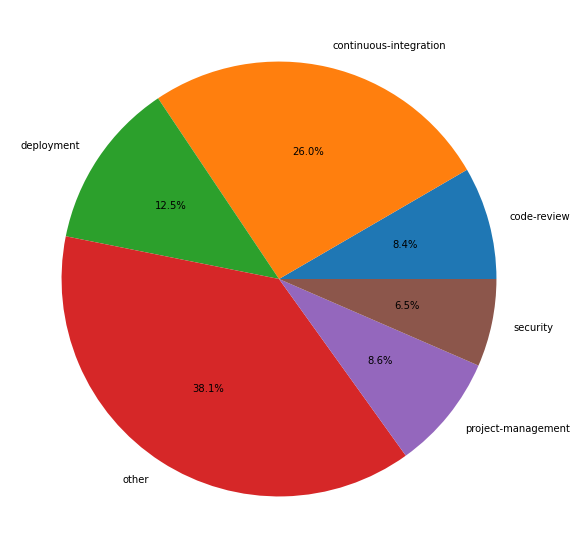

In [167]:
top5 = df_actions.groupby('primary_category').size().sort_values(ascending=False).head(5)
df_actions['primary_category'] = df_actions['primary_category'].apply(lambda x: x if x in top5 else 'other')
plt.figure(figsize=(10,10))
plt.pie(df_actions.groupby('primary_category').size(), labels=df_actions.groupby('primary_category').size().index, autopct='%1.1f%%')